In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [3]:
print(soup)


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-featu

In [4]:
soup.find('table')


<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Question_book-new.svg"><img alt="" class="mw-file-element" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></span></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a href="/wiki/Special

In [5]:
soup.find_all('table')[1]


<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [7]:
table = soup.find_all('table')[1]


In [8]:
table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [9]:
world_titles = table.find_all('th')


In [10]:
world_titles


[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [11]:
world_table_titles = [title.text.strip() for title in world_titles]

print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [12]:
import pandas as pd


In [13]:
df = pd.DataFrame(columns = world_table_titles)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [14]:
column_data = table.find_all('tr')


In [15]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data

In [16]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [21]:
# Check the data types of the DataFrame
print(df.dtypes)

# Display the first few rows of the column to understand its contents
print(df['Revenue (USD millions)'].head())


Rank                      object
Name                      object
Industry                  object
Revenue (USD millions)     int64
Revenue growth            object
Employees                 object
Headquarters              object
dtype: object
0    611289
1    513983
2    413680
3    394328
4    324162
Name: Revenue (USD millions), dtype: int64


In [24]:
# Ensure the column is treated as string and then replace commas
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype(str).str.replace(',', '')

# Convert the column to numeric
df['Revenue (USD millions)'] = pd.to_numeric(df['Revenue (USD millions)'], errors='coerce')

# Check if there are any NaN values after conversion and handle them
print(df['Revenue (USD millions)'].isna().sum())

# Optionally, drop rows with NaN values or fill them with a specific value
df = df.dropna(subset=['Revenue (USD millions)'])


0


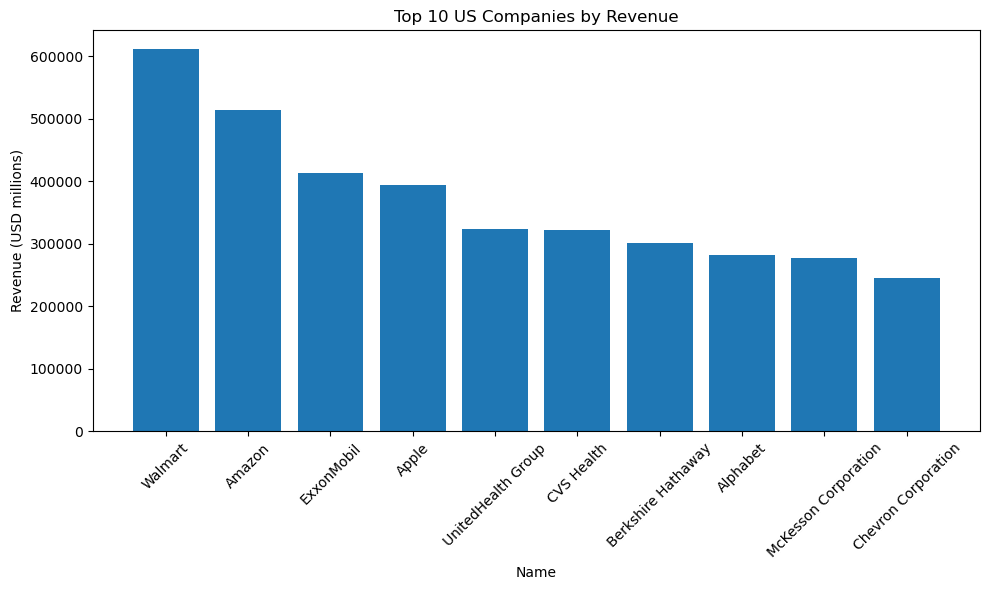

In [27]:
import matplotlib.pyplot as plt

# Bar plot of the top 10 companies by revenue
top_10 = df.nlargest(10, 'Revenue (USD millions)')

plt.figure(figsize=(10, 6))
plt.bar(top_10['Name'], top_10['Revenue (USD millions)'])
plt.xlabel('Name')
plt.ylabel('Revenue (USD millions)')
plt.title('Top 10 US Companies by Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


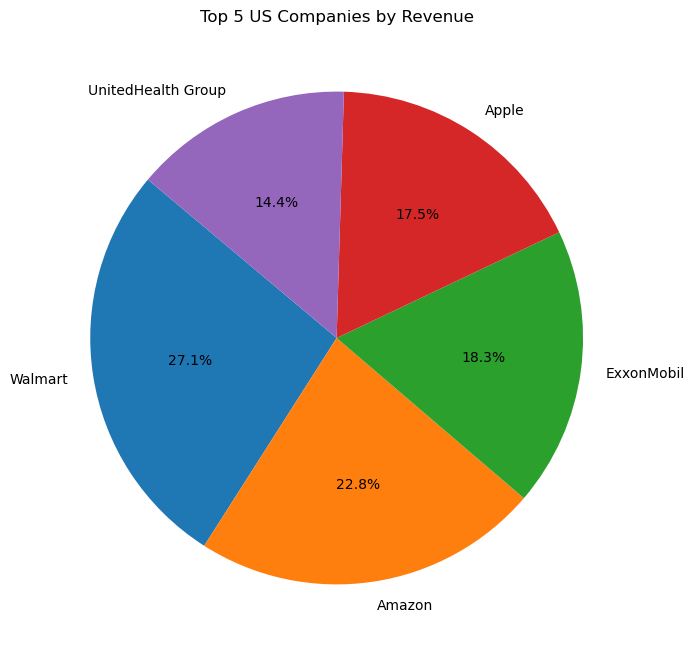

In [28]:
# Pie chart of the top 5 companies by revenue
top_5 = df.nlargest(5, 'Revenue (USD millions)')

plt.figure(figsize=(8, 8))
plt.pie(top_5['Revenue (USD millions)'], labels=top_5['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 US Companies by Revenue')
plt.show()


In [33]:
# Assuming the DataFrame has a column 'Industry' and 'Revenue (USD millions)'

# Group by 'Industry' and sum the revenues
industry_revenue = df.groupby('Industry')['Revenue (USD millions)'].sum().reset_index()

# Sort the industries by total revenue in descending order and select the top 5
top_5_industries = industry_revenue.nlargest(5, 'Revenue (USD millions)')


In [39]:
# Ensure the 'Revenue (USD df)' column is numeric
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype(str).str.replace(',', '')
df['Revenue (USD millions)'] = pd.to_numeric(df['Revenue (USD millions)'], errors='coerce')

# Group by 'Industry' and sum the revenues
industry_revenue = df.groupby('Industry')['Revenue (USD millions)'].sum().reset_index()

# Sort the industries by total revenue in descending order and select the top 5
top_5_industries = industry_revenue.nlargest(5, 'Revenue (USD millions)')



In [37]:
industry_revenue

,Industry,Revenue (USD millions)
0,Aerospace and defense,132592
1,Agriculture cooperative,47194
2,Agriculture manufacturing,52577
3,Airline,144508
4,Apparel,46710
5,Automotive and energy,81462
6,Automotive industry,314792
7,Beverage,86859
8,Chemical industry,56902
9,Conglomerate,445718


In [38]:
top_5_industries

,Industry,Revenue (USD millions)
32,Retail,1578909
28,Petroleum industry,1521225
21,Healthcare,1189368
15,Financials,927262
35,Technology and cloud computing,541636


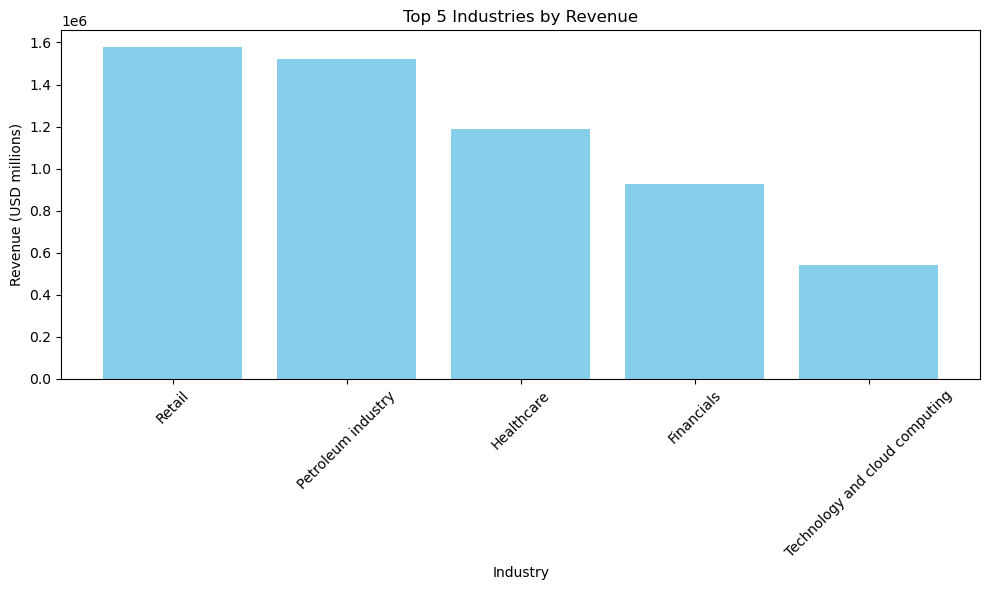

In [40]:
# Bar plot for the top 5 industries by revenue
plt.figure(figsize=(10, 6))
plt.bar(top_5_industries['Industry'], top_5_industries['Revenue (USD millions)'], color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Revenue (USD millions)')
plt.title('Top 5 Industries by Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Assuming there's a time series data
# Example column names: 'Year', 'Revenue (USD millions)'

# Line plot of revenue over years for a specific company
company_name = 'Company XYZ'  # Replace with the actual company name
company_data = df[data['Company'] == company_name]

plt.figure(figsize=(10, 6))
plt.plot(company_data['Year'], company_data['Revenue (USD millions)'], marker='o')
plt.xlabel('Year')
plt.ylabel('Revenue (USD millions)')
plt.title(f'Revenue over Years for {company_name}')
plt.show()
